### Name- Devshekhar Pattnaik

### Reg No-19BCE1292

### Slot-L19-20


# <center> Web Mining Lab-7 </center>

<br>

<b>Q1. You are given 9 one-line documents here. Consider the following keywords to represent the documents in the vector space model: 
[1]  Automotive  [2]  Car  [3] motorcycles [4] self-drive [5] IoT  [6] hire   [7] Dhoni
Represent the documents in vector space Model using these keywords and use it as input to cluster the documents using Manhattan distance as parameter. Ignore case differences.
You need to do hierarchical clustering with single-link, complete-link, average-link agglomerative clustering.</b>

<u>Algorithm</u>

1. Calculate the similarity of one cluster with all the other clusters (calculate proximity matrix)
2. Consider every data point as a individual cluster
3. Merge the clusters which are highly similar or close to each other.
4. Recalculate the proximity matrix for each cluster
5. Repeat Step 3 and 4 until only a single cluster remains.

<u>Data structures Used</u>

1. List
2. Array

In [1]:
# importing all required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import string
%matplotlib inline

In [2]:
# storing the keywords in a list
q=["automotive","car","motorcycles","self-drive","iot","hire","dhoni"]

In [4]:
# reading each document and computing the matrix
w=[]
for i in range(1, 10):
    freq=[]
    for y in q:
        c=0
        f = open('doc' + str(i) + '.txt', 'r')
        for x in f:
            for word in x.split():
                word.strip(string.punctuation)
                if word.lower()==y:
                    c=c+1
        freq.append(c)
    w.append(freq)
w

[[1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0],
 [0, 1, 0, 1, 1, 0, 0],
 [1, 0, 0, 0, 0, 1, 0],
 [0, 1, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 1]]

In [5]:
# performing the clustering
from sklearn.cluster import AgglomerativeClustering
docs=['doc1','doc2','doc3','doc4','doc5','doc6','doc7','doc8','doc9']
cluster = AgglomerativeClustering(n_clusters=9,affinity='manhattan', linkage='single')
cluster.fit_predict(w)

array([8, 5, 4, 7, 6, 3, 1, 2, 0], dtype=int64)

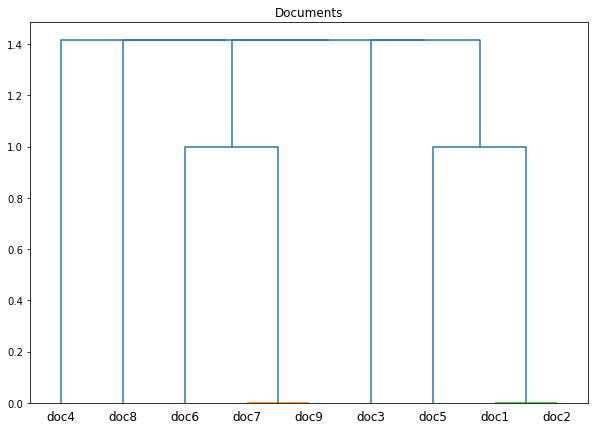

In [6]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Documents")
dend = shc.dendrogram(shc.linkage(w, method='single'),labels=docs)

In [7]:
cluster = AgglomerativeClustering(n_clusters=9, affinity='manhattan', linkage='complete')
cluster.fit_predict(w)

array([8, 7, 4, 5, 6, 2, 3, 1, 0], dtype=int64)

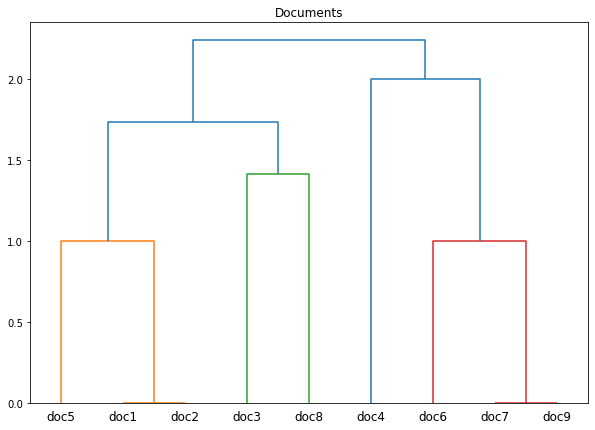

In [8]:
plt.figure(figsize=(10, 7))
plt.title("Documents")
dend = shc.dendrogram(shc.linkage(w, method='complete'),labels=docs)

In [9]:
cluster = AgglomerativeClustering(n_clusters=9, affinity='manhattan', linkage='average')
cluster.fit_predict(w)

array([8, 7, 4, 3, 6, 5, 1, 2, 0], dtype=int64)

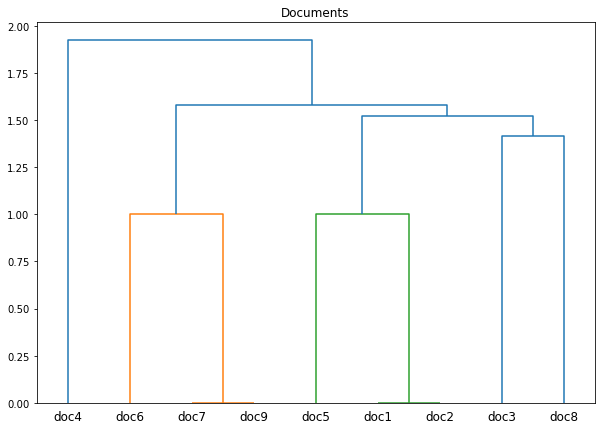

In [10]:
# producing the final Dendrogram
plt.figure(figsize=(10, 7))
plt.title("Documents")
dend = shc.dendrogram(shc.linkage(w, method='average'),labels=docs)

<b>Q2. Use the same program which you have developed for part A to do “hierarchical clustering” of the following web documents.  Use the keywords.
[1] Tesla [2] Electric [3] Car/Vehicle/Automobile [4] pollution [5] de-monetisation [6] GST [7] black money 
Download the webpage into a .txt file [ignore images, tables and limit the size of the document to 500 words Max] and build your vector space model using Term frequency.
Ignore case differences.  Treat singular and plural of nouns as same.  Treat Car/vehicle/automobile as one word [synonyms]. Treat “black money” as a single word.
</b>

In [11]:
# importing all required libraries
import string
import pandas as pd
import math
import matplotlib.pyplot as plt
import requests
import re
from bs4 import BeautifulSoup
from bs4.element import Comment
from nltk.stem import PorterStemmer
from urllib.request import urlopen
import codecs

In [12]:
# storing the urls in a list
urls = ['https://www.zigwheels.com/newcars/Tesla',
        'https://www.financialexpress.com/auto/car-news/mahindra-to-launch-indias-first-electric-suv-in-2019-all-new-e-verito-sedan-on-cards/1266853/',
        'https://en.wikipedia.org/wiki/Toyota_Prius',
        'https://economictimes.indiatimes.com/industry/auto/auto-news/government-plans-new-policy-to-promote-electric-vehicles/articleshow/65237123.cms',
        'https://indianexpress.com/article/india/india-news-india/demonetisation-hits-electric-vehicles-industry-society-of-manufacturers-of-electric-vehicles-4395104/',
        'https://www.livemint.com/Politics/ySbMKTIC4MINsz1btccBJO/How-demonetisation-affected-the-Indian-economy-in-10-charts.html',
        'https://inc42.com/buzz/electric-vehicles-this-week-centre-reduces-gst-on-lithium-ion-batteries-hyundai-to-launch-electric-suv-in-india-and-more/',
        'https://www.youthkiawaaz.com/2017/12/impact-of-demonetisation-on-the-indian-economy/',
        'https://indianexpress.com/article/india/demonetisation-effects-cash-crisis-mobile-wallets-internet-banking-4406005/',
        'https://www.news18.com/news/business/how-gst-will-curb-tax-evasion-1446035.html',
        'https://economictimes.indiatimes.com/small-biz/policy-trends/is-gst-helping-the-indian-economy-for-the-better/articleshow/65319874.cms']

In [13]:
# downloading and converting webpages into text files
import requests
from bs4 import BeautifulSoup

def getText(url):
    res = requests.get(url)
    html_page = res.content
    soup = BeautifulSoup(html_page, 'html.parser')
    text = soup.find_all(text=True)
    output = ''
    blacklist = [
    '[document]',
    'noscript',
    'header',
    'html',
    'meta',
    'head', 
    'input',
    'script',
    'style',
    'a'
    ]
    for t in text:
        if t.parent.name not in blacklist:
            if not isinstance(t, Comment):
                if not re.match(r"[\s\r\n]+",str(t)): 
                    if not re.match(r"www.", str(t)):
                        output += '{} '.format(t)
    return output

In [14]:
i=1
for x in urls:
    file=codecs.open('doc'+str(i)+'.txt','w','utf-8')
    file.writelines(getText(x))
    file.close()
    i=i+1

In [15]:
# storing the keywords in a list
q=["Tesla","Electric","Car","pollution","demonetisation","GST","black money"]

In [16]:
# reading each document and computing the matrix
w=[]
for i in range(1, 12):
    freq=[]
    for y in q:
        c=0
        f = open('doc' + str(i) + '.txt', 'r',encoding='utf-8')
        for x in f:
            x.lower().replace('vehicle', 'car').replace('automobile', 'car').split()
            for word in x.split():
                w1=word.strip(string.punctuation)
                if w1.lower()==y.lower():
                    c=c+1
        freq.append(c)
    w.append(freq)
w

[[33, 3, 17, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 8, 56, 0, 0, 0, 0],
 [0, 13, 0, 0, 0, 0, 0],
 [0, 12, 0, 0, 5, 0, 0],
 [0, 0, 1, 0, 4, 0, 0],
 [0, 23, 1, 1, 0, 7, 0],
 [0, 0, 0, 0, 16, 0, 0],
 [0, 0, 0, 0, 3, 0, 0],
 [0, 0, 0, 0, 0, 10, 0],
 [0, 0, 0, 0, 0, 15, 0]]

In [17]:
# performing the clustering
from sklearn.cluster import AgglomerativeClustering
docs=['doc1','doc2','doc3','doc4','doc5','doc6','doc7','doc8','doc9','doc10','doc11']
cluster = AgglomerativeClustering(n_clusters=11,affinity='manhattan', linkage='single')
cluster.fit_predict(w)

array([ 5,  9,  7,  8,  6,  2, 10,  3,  4,  1,  0], dtype=int64)

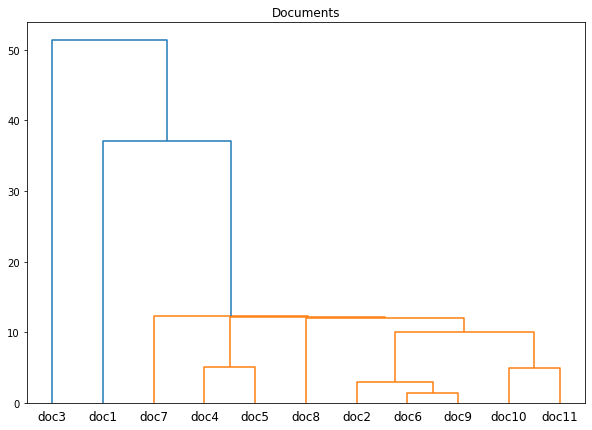

In [18]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Documents")
dend = shc.dendrogram(shc.linkage(w, method='single'),labels=docs)

In [19]:
cluster = AgglomerativeClustering(n_clusters=11, affinity='manhattan', linkage='complete')
cluster.fit_predict(w)

array([ 5,  9,  7,  8, 10,  4,  6,  2,  3,  1,  0], dtype=int64)

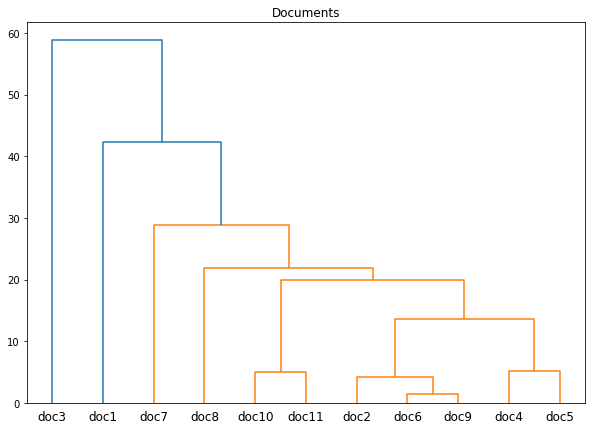

In [20]:
plt.figure(figsize=(10, 7))
plt.title("Documents")
dend = shc.dendrogram(shc.linkage(w, method='complete'),labels=docs)

In [21]:
cluster = AgglomerativeClustering(n_clusters=11, affinity='manhattan', linkage='average')
cluster.fit_predict(w)

array([ 5,  9,  7,  8, 10,  4,  3,  6,  2,  1,  0], dtype=int64)

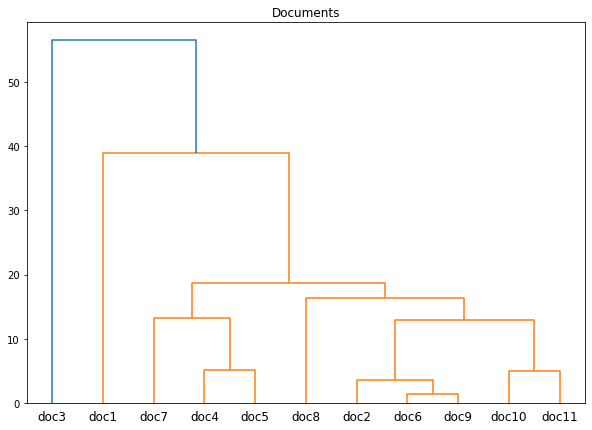

In [22]:
# producing the final Dendrogram
plt.figure(figsize=(10, 7))
plt.title("Documents")
dend = shc.dendrogram(shc.linkage(w, method='average'),labels=docs)